In [4]:
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

In [3]:
p = Path("./dataset/")
dirs = p.glob("*")

img_data = []
label_data = []

labels = {"Gengar":0, "Pikachu":1, "Bulbasaur":2}
img_label = {0:"Gengar", 1:"Pikachu", 2:"Bulbasaur"}

for d in dirs:
    
    label = str(d).split("/")[-1]
    print(d)
    
    cnt = 0
    
    for img_path in d.glob("*.jpg"):
        
#          print(img_path)
        
         img = image.load_img(img_path, target_size=(100, 100))
         img = image.img_to_array(img)
         img_data.append(img)
         label_data.append(labels[label])
        
         cnt += 1
    
    print(cnt)

dataset/Gengar
60
dataset/Pikachu
199
dataset/Bulbasaur
174


## Visualise

In [5]:
x = np.array(img_data)
y = np.array(label_data)

print(x.shape)
print(y.shape)

(433, 100, 100, 3)
(433,)


In [7]:
def drawImg(img, label):
    plt.title(img_label[label])
    plt.imshow(img)
    plt.axis("off")
    plt.show()

In [19]:
def sample(x, y):
    for i in range(10):
        t = np.random.randint(211)
        print(t)
        drawImg(x[t]/255.0, y[t])

28


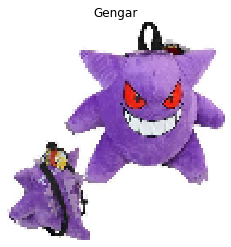

20


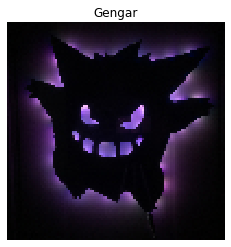

27


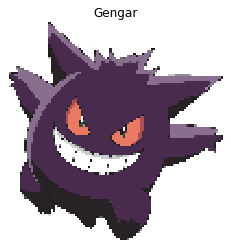

84


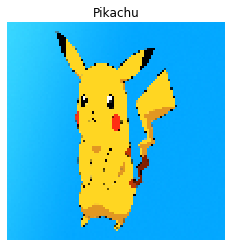

196


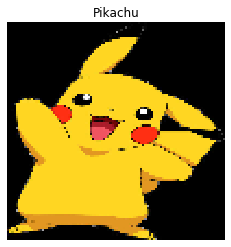

75


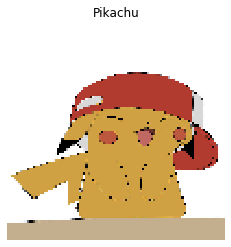

59


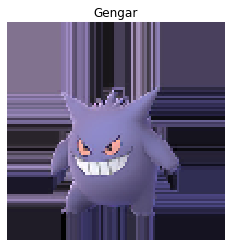

35


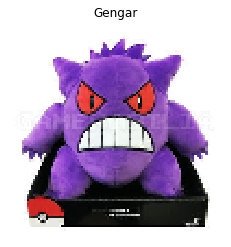

162


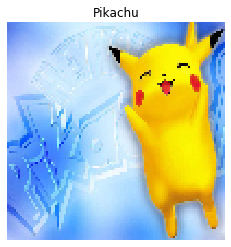

200


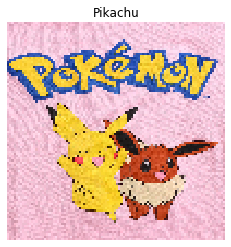

In [20]:
sample(x, y)

## Neural Network

In [1]:
class neuralNetwork:

    def init(self, input_, layers, output_):
        
        model = {}
        
        # First layer
        model['W1'] = np.random.randn(input_, layers[0])
        model['b1'] = np.random.randn(1, layers[0])
        
        # Second layer
        model['W2'] = np.random.randn(layers[0], layers[1])
        model['b2'] = np.random.randn(1, layers[1])
        
        # Third layer
        model['W3'] = np.random.randn(layers[1], output_)
        
        self.model = model
        
    def forward(self, x):
        
        W1, W2, W3 = self.model['W1'], self.model['W2'], self.model['W3']
        b1, b2, b3 = self.model['b1'], self.model['b2'], self.model['b3']
        
        z1 = np.dot(x, W1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1, W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2, W3) + b3
        
        y_ = softmax(z3)
        
        self.activation_values = (a1, a2, y_)
        
        return y_
        
    def backward(self, x, y, learning_rate=0.0001):
        
        W1, W2, W3 = self.model['W1'], self.model['W2'], self.model['W3']
        b1, b2, b3 = self.model['b1'], self.model['b2'], self.model['b3']
        m = x.shape[0]
        
        a1, a2, y_ = self.activation_values
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T, delta3)
        db3 = np.sum(delta3, axis=0)/float(m)
        xcc
        delta2 = (1 - np.square(a2))*np.dot(delta3, W3.T)
        dw2 = np.dot(a1.T, delta2)
        db2 = np.sum(delta2, axis=0)/float(m)
        
        delta1 = (1 - np.square(a1))*np.dot(delta2, W2.T)
        dw1 = np.dot(x.T, delta1)
        db1 = np.sum(delta1, axis=0)/float(m)
        
        self.model['W1'] -= learning_rate*dw1
        self.model['b1'] -= learning_rate*db1
        
        self.model['W2'] -= learning_rate*dw2
        self.model['b2'] -= learning_rate*db2
        
        self.model['W3'] -= learning_rate*dw3
        self.model['b3'] -= learning_rate*db3
        
    def predict(self, x):
        y_out = forward(x)
        return np.argmax(y_out, axis=1)
    
    def summary(self):
        
        W1, W2, W3 = self.model['W1'], self.model['W2'], self.model['W3']
        a1, a2, a3 = self.activation_values
        
        print("W1", W1.shape)
        print("A1", a1.shape)

        print("W2", W2.shape)
        print("A2", a2.shape)
        
        print("W3", W3.shape)
        print("A3", a3.shape)